# RSSI Data Prediction using Random Forest

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading csv files to Dataframes

In [10]:
def load_data(file_paths):
    all_data = []
    for path in file_paths:
        df = pd.read_csv(path)
    return df
    
file_paths = ['rssi_data_PB.csv', 'rssi_data_stbkscc.csv', 'rssi_data_ccl.csv', 'rssi_data_roastd.csv'] 
df = load_data(file_paths)
print(df.head())

             timestamp         ssid               bssid  rssi  crowd_count
0  2024-11-09 11:11:36    Roastd-JC  38:3f:b3:45:d8:a0:   -49           20
1  2024-11-09 11:11:36  newportwifi  82:8a:20:25:91:ec:   -92           20
2  2024-11-09 11:11:36  newportwifi  82:8a:20:25:94:12:   -72           20
3  2024-11-09 11:11:36  newportwifi  7e:8a:20:24:91:ec:   -68           20
4  2024-11-09 11:11:36  newportwifi  7e:8a:20:24:94:12:   -59           20


In [14]:
# converting timestamp to a numerical feature
df['timestamp'] = pd.to_datetime(df['timestamp']).astype('int64') // 10**9

# Eencoding categorical features
df = pd.get_dummies(df, columns=['ssid', 'bssid'], drop_first=True)

In [16]:
X = df.drop('crowd_count', axis=1)
y = df['crowd_count']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predicting on test data
y_pred = rf_model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.48
R-squared: 0.95


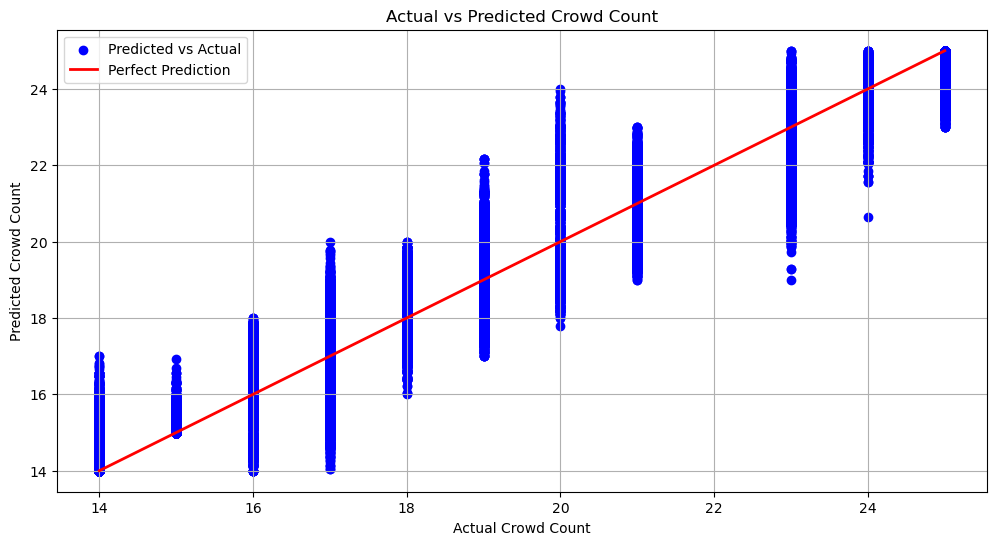

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Crowd Count')
plt.ylabel('Predicted Crowd Count')
plt.title('Actual vs Predicted Crowd Count')
plt.legend()
plt.grid(True)
plt.show()

### Insights

- Overall, most of the predicted values align reasonably well with the perfect prediction, suggesting the model has a decent level of accuracy.
- We can see that the model can predict the crowd size between 16 and 22 well.
- The model has no bias when predicting a count close to the true value.
- There is a presence of variance indicating the model's predictions are sometimes inconsistent. It could be overfitting to certain features or not capturing all patterns effectively